In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_excel("Occutrain.xlsx")

In [3]:
df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8138,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8139,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8140,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8141,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


In [4]:
x=df[['Temperature','Humidity','Light','CO2','HumidityRatio']]
y=df[['Occupancy']]

In [5]:
X=x.values
Y=y.values

## Implement Logistic Regression

In [6]:
model1=LogisticRegression()
model1.fit(X,Y)

c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [7]:
df2=pd.read_excel("Occutest.xlsx")

In [8]:
df2.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [9]:
len(df2)

2665

In [10]:
x_test=df2[['Temperature','Humidity','Light','CO2','HumidityRatio']].values
y_test=df2[['Occupancy']].values

In [11]:
model1.score(x_test,y_test)

0.976360225140713

## Implement Support Vector Machine (SVM)

In [12]:
from sklearn.svm import SVC
model2=SVC()
model2.fit(X,Y)

c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [13]:
model2.score(x_test,y_test)

0.9767354596622889

## Implement Decision Tree

In [14]:
from sklearn import tree
model3=tree.DecisionTreeClassifier()
model3.fit(X,Y)

DecisionTreeClassifier()

In [15]:
model3.score(x_test,y_test)

0.9212007504690432

# Apply Hyperperameter Tunning

In [16]:
from sklearn.model_selection import GridSearchCV


In [17]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params': {
            'C': [1, 10, 20],
            'kernel': ['rbf', 'linear']
        }
    },
    'decision_tree': {
        'model': tree.DecisionTreeClassifier(),
        'params': {
            'max_depth': [1, 5, 10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C': [1, 5, 10]
        }
    }
}



In [18]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X,Y )
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df3 = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df3

c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

,model,best_score,best_params
0,svm,0.973718,"{'C': 1, 'kernel': 'linear'}"
1,decision_tree,0.976181,{'max_depth': 1}
2,logistic_regression,0.986247,{'C': 1}


In [19]:
final_model=LogisticRegression(C=1)
final_model.fit(X,Y)
final_model.score(x_test,y_test)

c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.976360225140713

In [20]:
pred=final_model.predict(x_test)

In [21]:
pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [22]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)


In [23]:
cm

array([[1639,   54],
       [   9,  963]], dtype=int64)

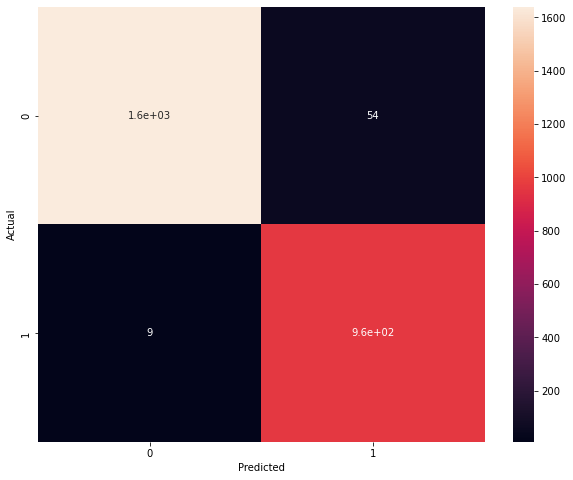

In [24]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()